### **Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.**

---



**1. Load the Dataset**

---



In [ ]:
import pandas as pd

# Load the dataset
url = "https://data.cityofnewyork.us/resource/h9gi-nx95.csv?$limit=50000"
df = pd.read_csv(url)

# Display the first few rows of the dataframe
print(df.head())


                crash_date crash_time   borough  zip_code   latitude  \
0  2021-09-11T00:00:00.000       2:39       NaN       NaN        NaN   
1  2022-03-26T00:00:00.000      11:45       NaN       NaN        NaN   
2  2022-06-29T00:00:00.000       6:55       NaN       NaN        NaN   
3  2021-09-11T00:00:00.000       9:35  BROOKLYN   11208.0  40.667202   
4  2021-12-14T00:00:00.000       8:13  BROOKLYN   11233.0  40.683304   

   longitude                        location           on_street_name  \
0        NaN                             NaN    WHITESTONE EXPRESSWAY   
1        NaN                             NaN  QUEENSBORO BRIDGE UPPER   
2        NaN                             NaN       THROGS NECK BRIDGE   
3 -73.866500    \n,  \n(40.667202, -73.8665)                      NaN   
4 -73.917274  \n,  \n(40.683304, -73.917274)          SARATOGA AVENUE   

  off_street_name        cross_street_name  ...  \
0       20 AVENUE                      NaN  ...   
1             NaN         

**2. Data Cleaning**

---



In [ ]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values in critical columns
df = df.dropna(subset=['latitude', 'longitude', 'crash_date', 'crash_time'])

# Convert date and time fields
df['crash_date'] = pd.to_datetime(df['crash_date'])
df['crash_time'] = pd.to_datetime(df['crash_time'], format='%H:%M').dt.time

# Extract hour from crash_time for analysis
df['hour'] = df['crash_time'].apply(lambda x: x.hour)

# Check the cleaned dataframe
print(df.info())


crash_date                           0
crash_time                           0
borough                          17253
zip_code                         17259
latitude                          3892
longitude                         3892
location                          3892
on_street_name                   13586
off_street_name                  26911
cross_street_name                36415
number_of_persons_injured            0
number_of_persons_killed             0
number_of_pedestrians_injured        0
number_of_pedestrians_killed         0
number_of_cyclist_injured            0
number_of_cyclist_killed             0
number_of_motorist_injured           0
number_of_motorist_killed            0
contributing_factor_vehicle_1      247
contributing_factor_vehicle_2    11202
contributing_factor_vehicle_3    44697
contributing_factor_vehicle_4    48562
contributing_factor_vehicle_5    49579
collision_id                         0
vehicle_type_code1                 597
vehicle_type_code2       

<ipython-input-3-6cbdd1858b89>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['crash_date'] = pd.to_datetime(df['crash_date'])
<ipython-input-3-6cbdd1858b89>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['crash_time'] = pd.to_datetime(df['crash_time'], format='%H:%M').dt.time
<ipython-input-3-6cbdd1858b89>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

**3. Exploratory Data Analysis (EDA)**

---



                          crash_date      zip_code      latitude  \
count                          46108  31927.000000  46108.000000   
mean   2021-08-30 17:15:33.495271936  10898.231090     40.485430   
min              2012-09-25 00:00:00  10000.000000      0.000000   
25%              2021-05-22 00:00:00  10457.000000     40.665520   
50%              2021-06-29 00:00:00  11208.000000     40.712739   
75%              2021-12-15 00:00:00  11238.000000     40.783429   
max              2024-07-18 00:00:00  11697.000000     40.912827   
std                              NaN    521.195641      3.108296   

          longitude  number_of_persons_injured  number_of_persons_killed  \
count  46108.000000               46108.000000              46108.000000   
mean     -73.483087                   0.468747                  0.002798   
min      -74.251840                   0.000000                  0.000000   
25%      -73.962020                   0.000000                  0.000000   
50%    

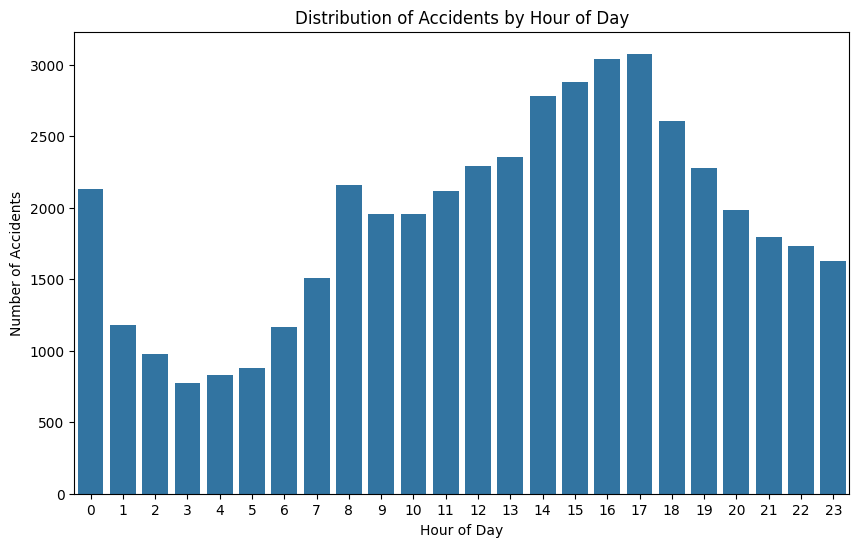

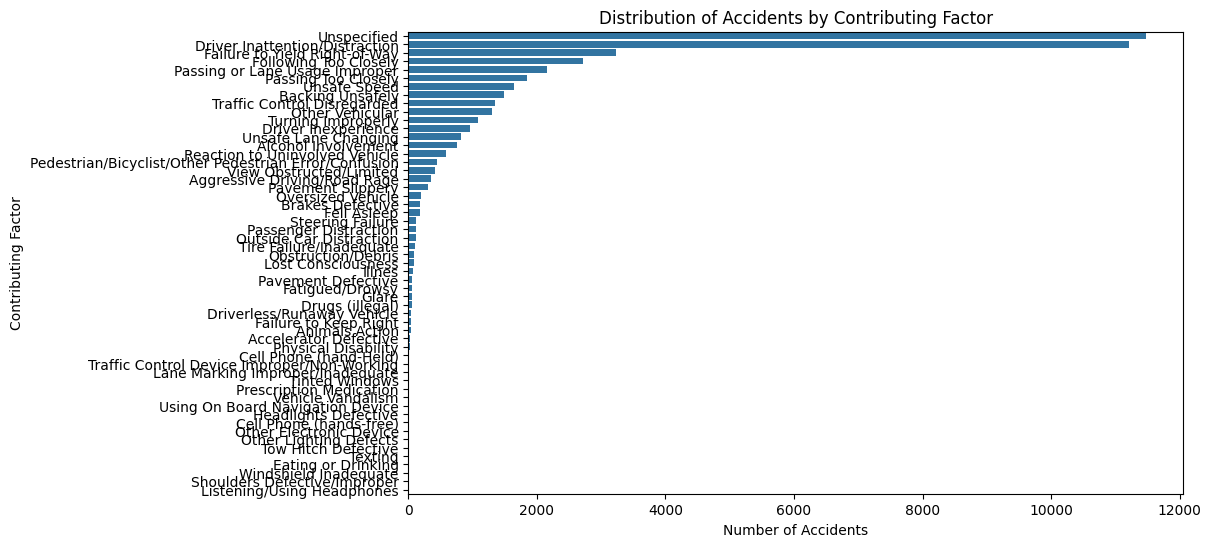

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(df.describe())

# Distribution of accidents by time of day
plt.figure(figsize=(10, 6))
sns.countplot(x='hour', data=df)
plt.title('Distribution of Accidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()

# Distribution of accidents by contributing factor
plt.figure(figsize=(10, 6))
sns.countplot(y='contributing_factor_vehicle_1', data=df, order=df['contributing_factor_vehicle_1'].value_counts().index)
plt.title('Distribution of Accidents by Contributing Factor')
plt.xlabel('Number of Accidents')
plt.ylabel('Contributing Factor')
plt.show()


**4. Pattern Analysis**

---



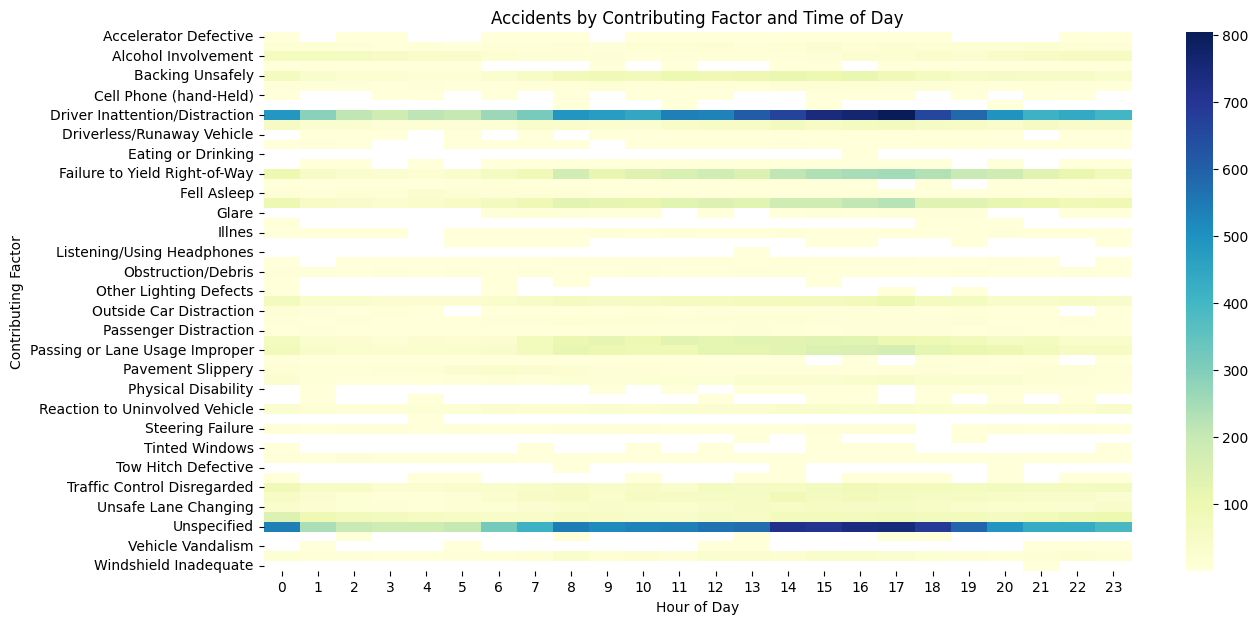

In [ ]:
# Accidents by contributing factor and time of day
plt.figure(figsize=(14, 7))
sns.heatmap(df.pivot_table(index='contributing_factor_vehicle_1', columns='hour', values='collision_id', aggfunc='count'), cmap='YlGnBu')
plt.title('Accidents by Contributing Factor and Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Contributing Factor')
plt.show()


**5. Hotspot Visualization**

---



In [ ]:
import folium
from folium.plugins import HeatMap

# Create a base map
map_center = [df['latitude'].mean(), df['longitude'].mean()]
base_map = folium.Map(location=map_center, zoom_start=10)

# Add a heatmap
heat_data = [[row['latitude'], row['longitude']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(base_map)

# Display the map
base_map


**6. Contributing Factors Visualization**

---



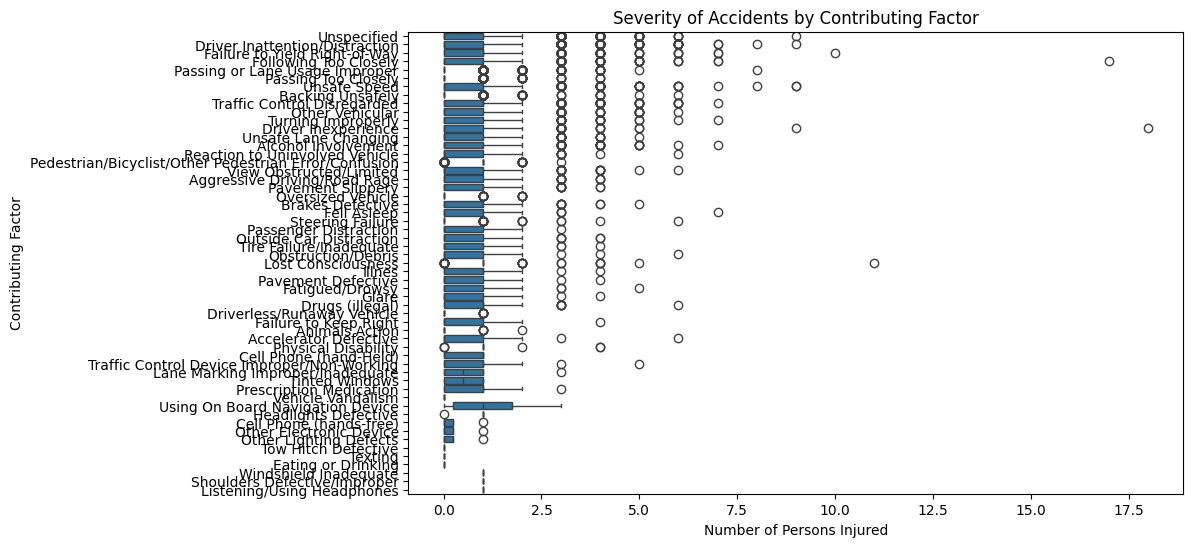

In [ ]:
# Severity of accidents by contributing factor
plt.figure(figsize=(10, 6))
sns.boxplot(x='number_of_persons_injured', y='contributing_factor_vehicle_1', data=df, order=df['contributing_factor_vehicle_1'].value_counts().index)
plt.title('Severity of Accidents by Contributing Factor')
plt.xlabel('Number of Persons Injured')
plt.ylabel('Contributing Factor')
plt.show()
